# Survival Analysis Lab

Complete the following exercises to solidify your knowledge of survival analysis.

In [18]:
import pandas as pd
import chart_studio.plotly as py # unnecesary
import plotly.express as px
import cufflinks as cf
from lifelines import KaplanMeierFitter

cf.go_offline()

In [3]:
!{sys.executable} -m pip install chart-studio

In [5]:
!{sys.executable} -m pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68729 sha256=fd1853849b0017934b1a93a2a3adb70232d9e74f8c7b7958335eaee10d6e60db
  Stored in directory: c:\users\eduardo\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [7]:
!{sys.executable} -m pip install lifelines

  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47994 sha256=1f0fc5959842073186bcee7b650cd073e5ad6e216bcf9145d036a90da1635078
  Stored in directory: c:\users\eduardo\appdata\local\pip\cache\wheels\85\f5\d2\3ef47d3a836b17620bf41647222825b065245862d12aa62885
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4039 sha256=2d4ca2c4c1386b75b39aa570817e1b5800637bdcc34222c2a6713a9a27ff6521
  Stored in directory: c:\users\eduardo\appdata\local\pip\cache\wheels\16\a2\b6\582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd autograd-gamma


In [12]:
data = pd.read_csv('..//data//attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## 1. Generate and plot a survival function that shows how employee retention rates vary by gender and employee age.

*Tip: If your lines have gaps in them, you can fill them in by using the `fillna(method=ffill)` and the `fillna(method=bfill)` methods and then taking the average. We have provided you with a revised survival function below that you can use for the exercises in this lab*

In [13]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [20]:
emp_rates = survival(data, 'Gender', 'Age', 'Attrition')
px.line(emp_rates, x=emp_rates.index, y=['Female', "Male"]).show()

## 2. Compare the plot above with one that plots employee retention rates by gender over the number of years the employee has been working for the company.

In [22]:
emp_rates = survival(data, 'Gender', 'YearsAtCompany', 'Attrition')
px.line(emp_rates, x=emp_rates.index, y=['Female', "Male"]).show()

## 3. Let's look at retention rate by gender from a third perspective - the number of years since the employee's last promotion. Generate and plot a survival curve showing this.

In [23]:
emp_rates = survival(data, 'Gender', 'YearsSinceLastPromotion', 'Attrition')
px.line(emp_rates, x=emp_rates.index, y=['Female', "Male"]).show()

## 4. Let's switch to looking at retention rates from another demographic perspective: marital status. Generate and plot survival curves for the different marital statuses by number of years at the company.

In [25]:

emp_rates = survival(data, 'MaritalStatus', 'YearsAtCompany', 'Attrition')
px.line(emp_rates, x=emp_rates.index, y=['Single', "Married", "Divorced"]).show()


## 5. Let's also look at the marital status curves by employee age. Generate and plot the survival curves showing retention rates by marital status and age.

In [26]:
emp_rates = survival(data, 'MaritalStatus', 'Age', 'Attrition')
px.line(emp_rates, x=emp_rates.index, y=['Single', "Married", "Divorced"]).show()

## 6. Now that we have looked at the retention rates by gender and marital status individually, let's look at them together. 

Create a new field in the data set that concatenates marital status and gender, and then generate and plot a survival curve that shows the retention by this new field over the age of the employee.

In [29]:
data['Gender&MaritalStat'] = data['Gender']+'_'+data['MaritalStatus']
emp_rates = survival(data, 'Gender&MaritalStat', 'Age', 'Attrition')
px.line(emp_rates, x=emp_rates.index, y=emp_rates.columns).show()

## 6. Let's find out how job satisfaction affects retention rates. Generate and plot survival curves for each level of job satisfaction by number of years at the company.

In [30]:
job_rates = survival(data, 'JobSatisfaction', 'YearsAtCompany', 'Attrition')
px.line(job_rates, x=job_rates.index, y=job_rates.columns).show()

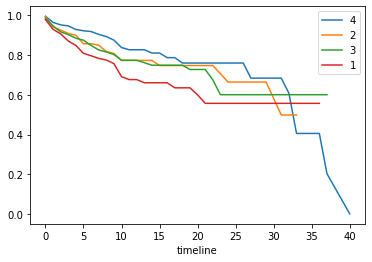

In [31]:
job_rates.plot()

## 7. Let's investigate whether the department the employee works in has an impact on how long they stay with the company. Generate and plot survival curves showing retention by department and years the employee has worked at the company.

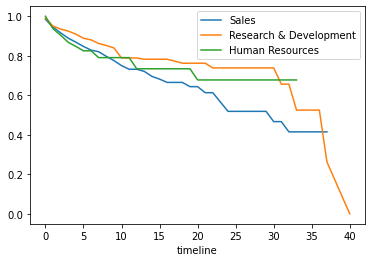

In [32]:
dep_rates = survival(data, 'Department', 'YearsAtCompany', 'Attrition')
dep_rates.plot()

## 8. From the previous example, it looks like the sales department has the highest attrition. Let's drill down on this and look at what the survival curves for specific job roles within that department look like.

Filter the data set for just the sales department and then generate and plot survival curves by job role and the number of years at the company.

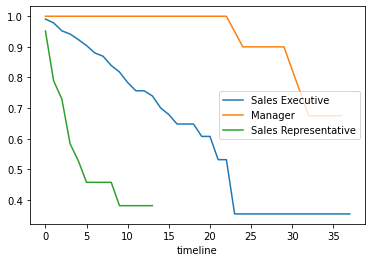

In [33]:
sales = survival(data.query('Department == "Sales"'), 'JobRole', 'YearsAtCompany', 'Attrition')
sales.plot()

## 9. Let examine how compensation affects attrition.

- Use the `pd.qcut` method to bin the HourlyRate field into 5 different pay grade categories (Very Low, Low, Moderate, High, and Very High).
- Generate and plot survival curves showing employee retention by pay grade and age.

In [35]:
data['HRrate_PayGrade'] = pd.qcut(data['HourlyRate'], 5, labels=['Very Low', 'Low', 'Moderate', 'High', "Very High"])
hrs_rate = survival(data, 'HRrate_PayGrade', 'Age', 'Attrition')
px.line(hrs_rate, x=hrs_rate.index, y=hrs_rate.columns).show()

## 10. Finally, let's take a look at how the demands of the job impact employee attrition.

- Create a new field whose values are 'Overtime' or 'Regular Hours' depending on whether there is a Yes or a No in the OverTime field.
- Create a new field that concatenates that field with the BusinessTravel field.
- Generate and plot survival curves showing employee retention based on these conditions and employee age.

In [40]:
import numpy as np
conditions = (data['OverTime'] =='Yes')
data['JobTimeDemand'] = np.where(conditions, 'Overtime', 'Regular Hours') # name of the column alone

data['Travel&JobTimeDemand'] = data['JobTimeDemand']+'_'+data['BusinessTravel']

time_rates = survival(data, 'Travel&JobTimeDemand', 'Age', 'Attrition')
px.line(time_rates, x=time_rates.index, y=time_rates.columns).show()